The above resource has several sections to it, but we will be focusing on the following three sections. Your task is to first implement and backtest the BTC long and short strategy, and then the moving average crossover strategy and then implement a similar startegy on any other asset class of your choice that is not part the crypto market.

1. Implement and bactest long short strat on BTC
2. Moving average cross over strategy on BTC
3. Similar strategy on other asset class

In [8]:
#Trading packages
import zipline 
import pyfolio as pf
import talib

#General datahandling and computation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Trading strategies for BTC

In [2]:
#Import data and drop index column
btc_data = pd.read_csv("https://raw.githubusercontent.com/codearmo/data/master/btc_master.csv",
                        parse_dates=['timestamp'])
btc_data.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [3]:
btc_data.head()

,volume,ticks,status,open,low,high,cost,close,timestamp
0,0.0,1.535756e+09,ok,7025.0,7025.0,7025.0,0.0,7025.0,2018-08-31 23:00:00
1,0.0,1.535756e+09,ok,7025.0,7025.0,7025.0,0.0,7025.0,2018-08-31 23:01:00
2,0.0,1.535757e+09,ok,7025.0,7025.0,7025.0,0.0,7025.0,2018-08-31 23:02:00
3,0.0,1.535757e+09,ok,7025.0,7025.0,7025.0,0.0,7025.0,2018-08-31 23:03:00
4,0.0,1.535757e+09,ok,7025.0,7025.0,7025.0,0.0,7025.0,2018-08-31 23:04:00


## Implementing Long-short strategy

The strategy is to buy on Fri, Sat, Sun. Sell all other days


In [4]:
#Feature engineering: 

#Extract weekday from timestamp
btc_data["day"] = btc_data["timestamp"].dt.weekday

#Convert day to buy/sell signal
btc_data["ls_entry"] = btc_data["day"].apply(lambda x: 1 if x >= 4 else -1)

### Apply strategy and compute returns

In [5]:
#Get log returns for each timeperiod
btc_data["returns"] = np.log(btc_data["close"]/btc_data["close"].shift(1))

#Employ strategy
btc_data["ls_returns"] = btc_data["ls_entry"] * btc_data["returns"]

#Sum strategy returns
btc_data["ls_total"] = btc_data["ls_returns"].cumsum()
#Sum btc total returns
btc_data["bench_total"] = btc_data["returns"].cumsum()

In [39]:
btc_data.iloc[40000:40010]

,volume,ticks,status,open,low,high,cost,close,day,ls_entry,returns,ls_returns,ls_total,bench_total,macd,macdsignal,macdhist,macd_vs_signal,macd_vs_signal_shifted
timestamp,,,,,,,,,,,,,,,,,,,
2018-09-28 17:13:00,0.025549,1.538155e+09,ok,6653.5,6653.5,6654.0,170.0,6654.0,4,1,0.000000,0.000000,0.117360,-0.054257,2.218379,2.354531,-0.136152,-0.136152,-0.099913
2018-09-28 17:14:00,0.022543,1.538155e+09,ok,6654.0,6654.0,6654.0,150.0,6654.0,4,1,0.000000,0.000000,0.117360,-0.054257,2.138039,2.311233,-0.173194,-0.173194,-0.136152
2018-09-28 17:15:00,0.226909,1.538155e+09,ok,6654.0,6654.0,6657.0,1510.0,6657.0,4,1,0.000451,0.000451,0.117811,-0.053806,2.290045,2.306995,-0.016950,-0.016950,-0.173194
2018-09-28 17:16:00,0.000000,1.538155e+09,ok,6657.0,6657.0,6657.0,0.0,6657.0,4,1,0.000000,0.000000,0.117811,-0.053806,2.383041,2.322204,0.060837,0.060837,-0.016950
2018-09-28 17:17:00,0.000000,1.538155e+09,ok,6657.0,6657.0,6657.0,0.0,6657.0,4,1,0.000000,0.000000,0.117811,-0.053806,2.428744,2.343512,0.085232,0.085232,0.060837
2018-09-28 17:18:00,0.000000,1.538155e+09,ok,6657.0,6657.0,6657.0,0.0,6657.0,4,1,0.000000,0.000000,0.117811,-0.053806,2.436873,2.362185,0.074689,0.074689,0.085232
2018-09-28 17:19:00,0.000000,1.538155e+09,ok,6657.0,6657.0,6657.0,0.0,6657.0,4,1,0.000000,0.000000,0.117811,-0.053806,2.415472,2.372842,0.042630,0.042630,0.074689
2018-09-28 17:20:00,1.104736,1.538155e+09,ok,6663.0,6661.0,6663.0,7360.0,6661.0,4,1,0.000601,0.000601,0.118412,-0.053206,2.690266,2.436327,0.253939,0.253939,0.042630
2018-09-28 17:21:00,0.912761,1.538155e+09,ok,6661.0,6661.0,6662.5,6080.0,6662.5,4,1,0.000225,0.000225,0.118637,-0.052980,2.994560,2.547973,0.446586,0.446586,0.253939


### Visualize LS strategy vs. BTC

/Users/oscarengelbrektson/anaconda/envs/zipline_env/lib/python3.6/site-packages/pandas/plotting/_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


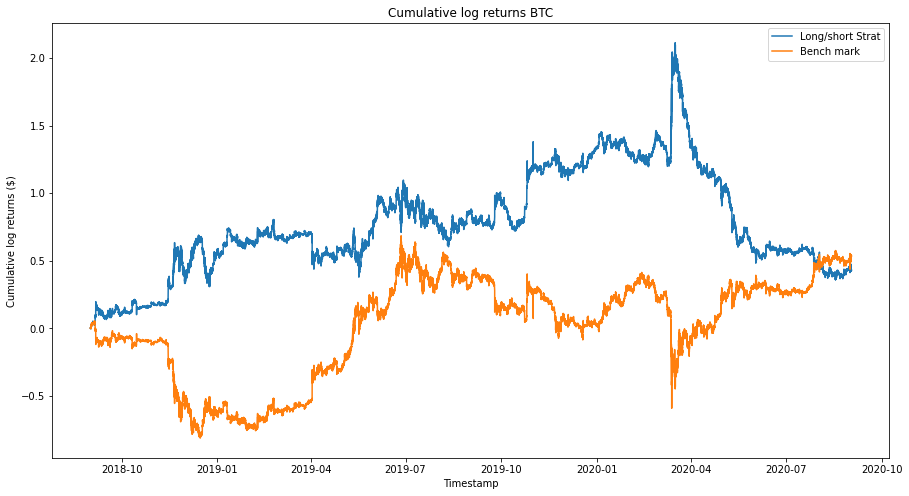

In [7]:
#Visualize strategy vs. BTC
plt.figure(figsize=(15, 8))
plt.plot(btc_data["timestamp"], btc_data["ls_total"], label="Long/short Strat")
plt.plot(btc_data["timestamp"], btc_data["bench_total"], label = "Bench mark")
plt.title("Cumulative log returns BTC")
plt.legend(loc=0)
plt.xlabel("Timestamp")
plt.ylabel("Cumulative log returns ($)")
plt.show()

Not accounting for trading costs, the strategy has done slightly better than the underlying asset for the majority of the trading history, with the exception being the last few months of trading where BTC caught up and surpassed the ls strategy. Accounting for costs, the strategy would most definitely perform worse than just buying and holding. This is not surprising, as there is no clear rationale for why one would expect BTC to increase in value on weekends and decrease over weekdays.

Start date,2018-08-31
End date,2020-09-01
Total months,50229
,Backtest
Annual return,-0.0%
Cumulative returns,-40.8%
Annual volatility,2.1%
Sharpe ratio,0.00
Calmar ratio,-0.00
Stability,0.11
Max drawdown,-85.7%


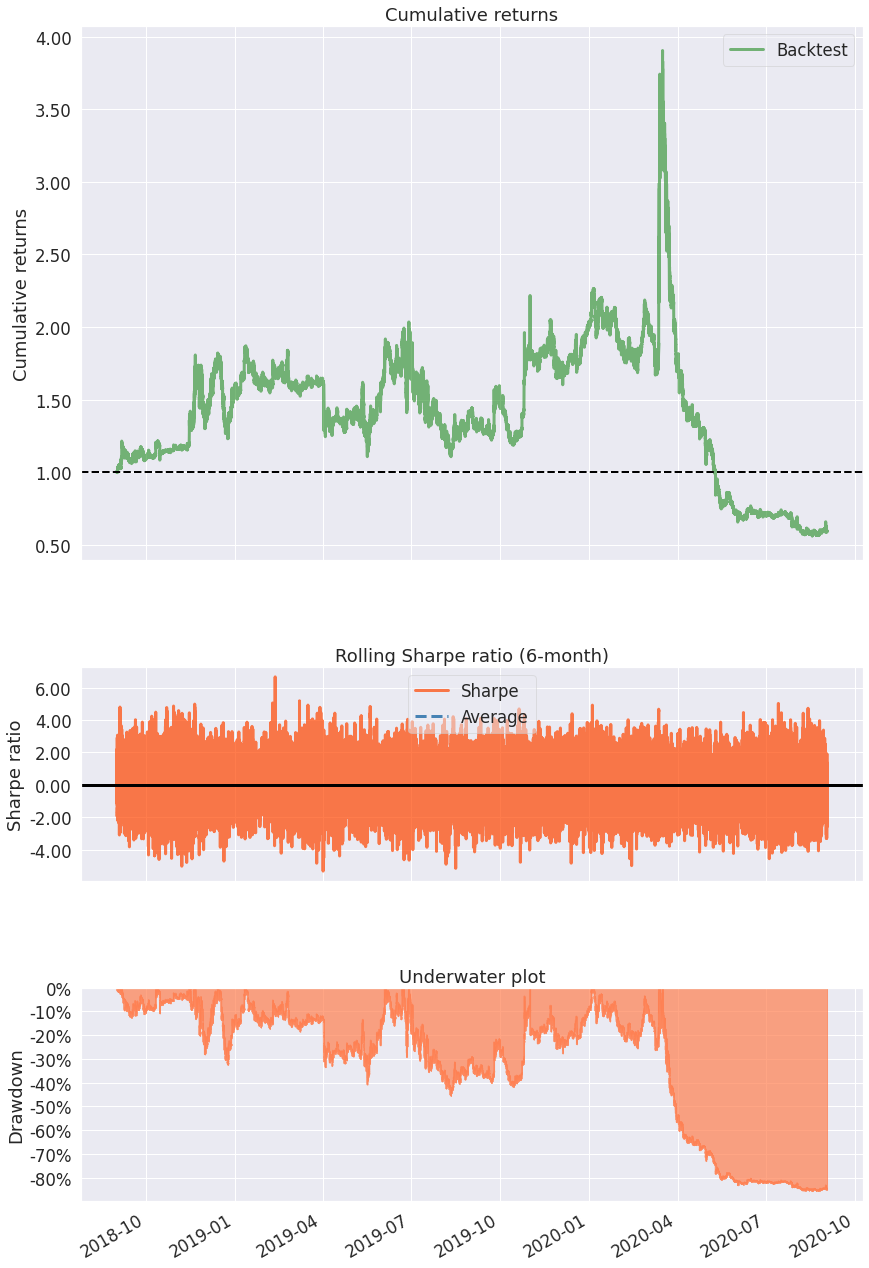

In [14]:
btc_data = btc_data.set_index("timestamp")
pf.create_simple_tear_sheet(btc_data.ls_returns)

## 2. Implementing MA strategy on BTC

In [55]:
class BackTestSA:
    '''
    Code from: "Backtesting with Python" on www.codearmo.com 
    
    backtesting class for all single asset strategies, 
    columns must include the following :
    close: float
    timestamp: date
    '''

    def __init__(self, dataframe, max_holding, commission):
        if not isinstance(dataframe, pd.DataFrame):
            raise TypeError('Dataframe must be pandas df')

        #vertical barrier variable
        self.max_holding = max_holding
        self.max_holding_limit = max_holding

        self.df = dataframe

        #trade variables
        self.open_pos = False
        self.entry_price = None
        self.direction = None
        self.target_price = None
        self.stop_price = None

        #barrier multipliers
        self.ub_mult = 1.005
        self.lb_mult = 0.995
        
        #special case of vertical barrier
        self.end_date = self.df.timestamp.values[-1]

        self.returns_series = []
        self.commission = commission



    def open_long(self, price):
        '''
        
        :param price: price we open long at
        :return: populates trade variables from constructor with relevant variables
        '''
        self.open_pos = True
        self.direction = 1
        self.entry_price = price
        self.target_price = price * self.ub_mult
        self.stop_price = price * self.lb_mult
        self.returns_series.append(self.commission)

    def open_short(self, price):
        '''
        
        :param price: price we open short at
        :return: populates trade variables from constructor with relevant variables
        '''
        self.open_pos = True
        self.direction = -1
        self.entry_price = price
        self.target_price = price * self.lb_mult
        self.stop_price = price * self.ub_mult
        self.returns_series.append(self.commission)

    def reset_variables(self):
        '''
        resets the variables after we close a trade
        '''
        self.open_pos = False
        self.entry_price = None
        self.direction = None
        self.target_price = None
        self.stop_price = None
        self.max_holding = self.max_holding_limit

    def close_position(self, price):
        '''
        
        :param price: price we are exiting trade at 
        :return: appends the trade pnl to the returns series 
        and resets variables 
        '''
        pnl = (price/self.entry_price-1)*self.direction
        self.returns_series.append(pnl - self.commission)
        self.reset_variables()


    def generate_signals(self):
        '''
        
        use this function to make sure generate signals has been included in the child class 
        '''
        if 'entry' not in self.df.columns:
            raise Exception('You have not created signals yet')



    def monitor_open_positions(self, price, timestamp):
        #check upper horizontal barrier for long positions
        if price >= self.target_price and self.direction == 1:
            self.close_position(price)
        #check lower horizontal barrier for long positions
        elif price <= self.stop_price and self.direction == 1:
            self.close_position(price)
        # check lower horizontal barrier for short positions
        elif price <= self.target_price and self.direction == -1:
            self.close_position(price)
        # check upper horizontal barrier for short positions
        elif price >= self.stop_price and self.direction == -1:
            self.close_position(price)
        # cehck special case of vertical barrier
        elif timestamp == self.end_date:
            self.close_position(price)
        # check vertical barrier
        elif self.max_holding <= 0:
            self.close_position(price)
        # if all above conditions not true, decrement max holding by 1 and append a zero to returns column
        else:
            self.max_holding = self.max_holding - 1
            self.returns_series.append(0)


    def run_backtest(self):
        #signals generated from child class
        self.generate_signals()
        
        #loop over dataframe 
        for row in self.df.itertuples():
            #if we get a long signal and do not have open position open a long
            if row.entry == 1 and self.open_pos is False:
                self.open_long(row.close)
            #if we get a short position and do not have open position open a sort
            elif row.entry == -1 and self.open_pos is False:
                self.open_short(row.close)
            #monitor open positions to see if any of the barriers have been touched, see function above
            elif self.open_pos:
                self.monitor_open_positions(row.close, row.timestamp)
            else:
                self.returns_series.append(0)

/Users/oscarengelbrektson/anaconda/envs/zipline_env/lib/python3.6/site-packages/empyrical/stats.py:1528: RuntimeWarning: invalid value encountered in double_scalars
  np.abs(np.percentile(returns, 5))


Start date,2018-08-31
End date,2020-09-01
Total months,50194
,Backtest
Annual return,0.1%
Cumulative returns,1574.8%
Annual volatility,2.3%
Sharpe ratio,0.04
Calmar ratio,0.00
Stability,0.82
Max drawdown,-40.3%


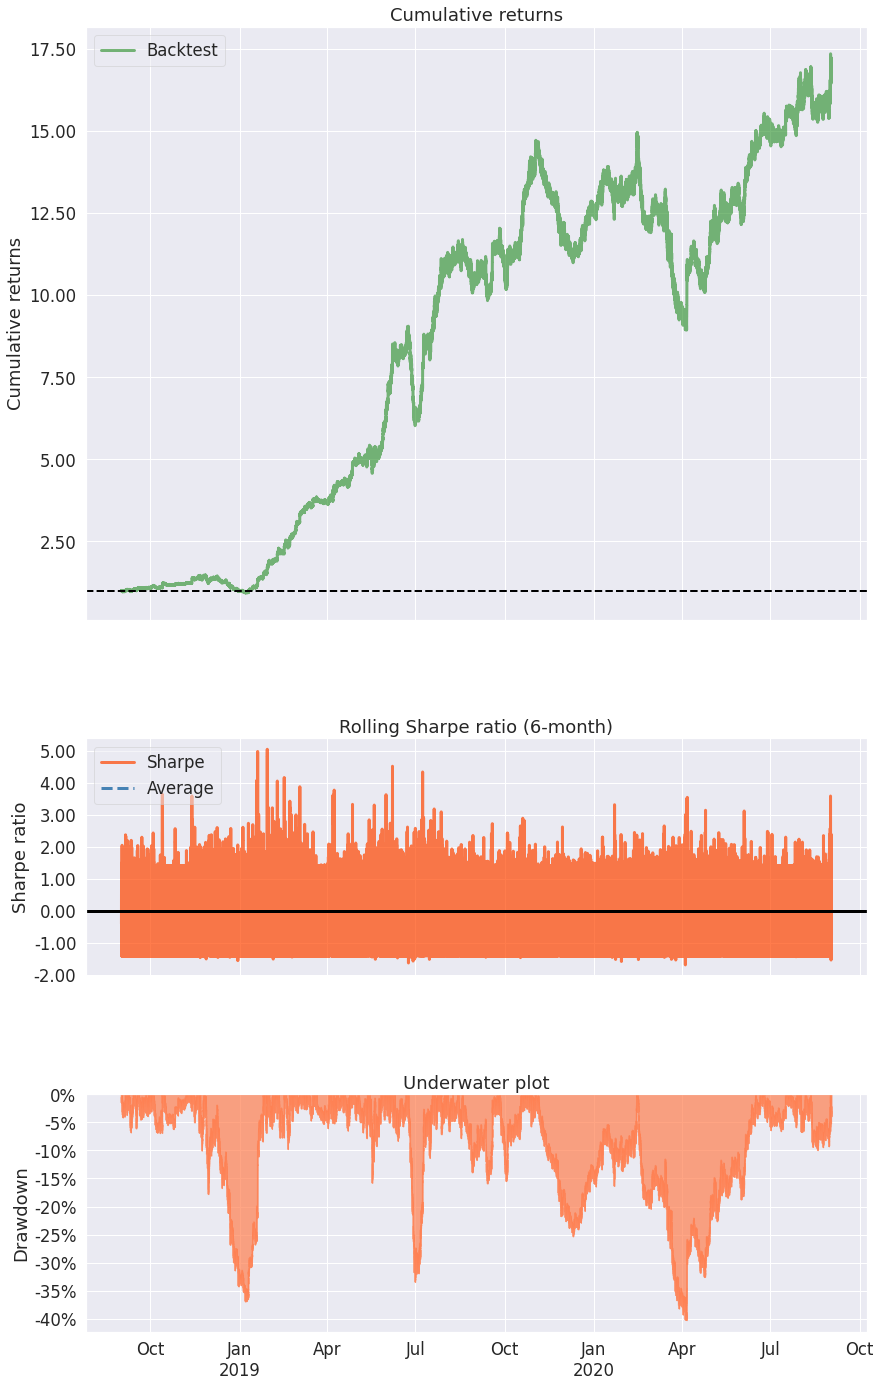

In [63]:
class MovingAverageStrategy(BackTestSA):

    def __init__(self, dataframe, max_holding, commission):
        super().__init__(dataframe, max_holding, commission)



    def generate_signals(self):

        df = self.df

        df['ma_20'] = df.close.rolling(20).mean()
        df['ma_50'] = df.close.rolling(50).mean()

        df['ma_diff'] = df.ma_20 - df.ma_50

        df['shorts'] = ((df.ma_diff > 0) & (df.ma_diff.shift(1) < 0)) * -1
        df['longs'] = ((df.ma_diff < 0) & (df.ma_diff.shift(1) > 0)) * 1

        df['entry'] = df.longs + df.shorts

        self.df = df


    def show_performace(self):
        m.df = m.df.set_index("timestamp")
        m.df['returns'] = m.returns_series

        pf.create_simple_tear_sheet( m.df['returns'])
        

dataframe = pd.read_csv('https://raw.githubusercontent.com/codearmo/data/master/cleaned_btc.csv',
                       parse_dates=['timestamp'])

max_holding = 180
commission = 0.01

m = MovingAverageStrategy(dataframe, max_holding, commission)

m.run_backtest()
m.show_performace()
m.df['returns'] = m.returns_series

Excluding trading costs, this moving average strategy would have performed extremely well over the last two years. Of course, the underlying asset performed extremely well too, as reflected in the very low Sharpe Ratio, as we know the volatility was 1% we can infer that the excess return must have been low.

# 3. Implementing MACD on Google stock


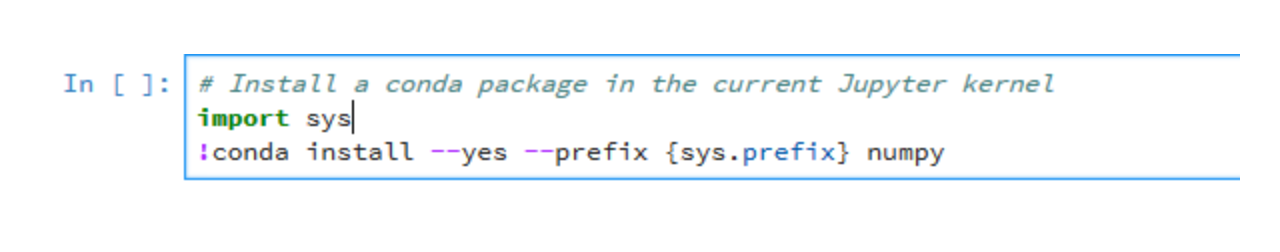

In [52]:
goog_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1462.000000,1490.000000,1458.989990,1485.939941,1485.939941,3036800
1,2020-02-04,1457.069946,1469.500000,1426.300049,1447.069946,1447.069946,3933000
2,2020-02-05,1462.420044,1463.839966,1430.560059,1448.229980,1448.229980,1986200
3,2020-02-06,1450.329956,1482.000000,1449.569946,1476.229980,1476.229980,1679400
4,2020-02-07,1467.300049,1485.839966,1466.349976,1479.229980,1479.229980,1172300


/Users/oscarengelbrektson/anaconda/envs/zipline_env/lib/python3.6/site-packages/empyrical/stats.py:1528: RuntimeWarning: divide by zero encountered in double_scalars
  np.abs(np.percentile(returns, 5))


Start date,2018-01-31
End date,2021-01-29
Total months,35
,Backtest
Annual return,1.4%
Cumulative returns,4.4%
Annual volatility,9.6%
Sharpe ratio,0.20
Calmar ratio,0.15
Stability,0.32
Max drawdown,-9.6%


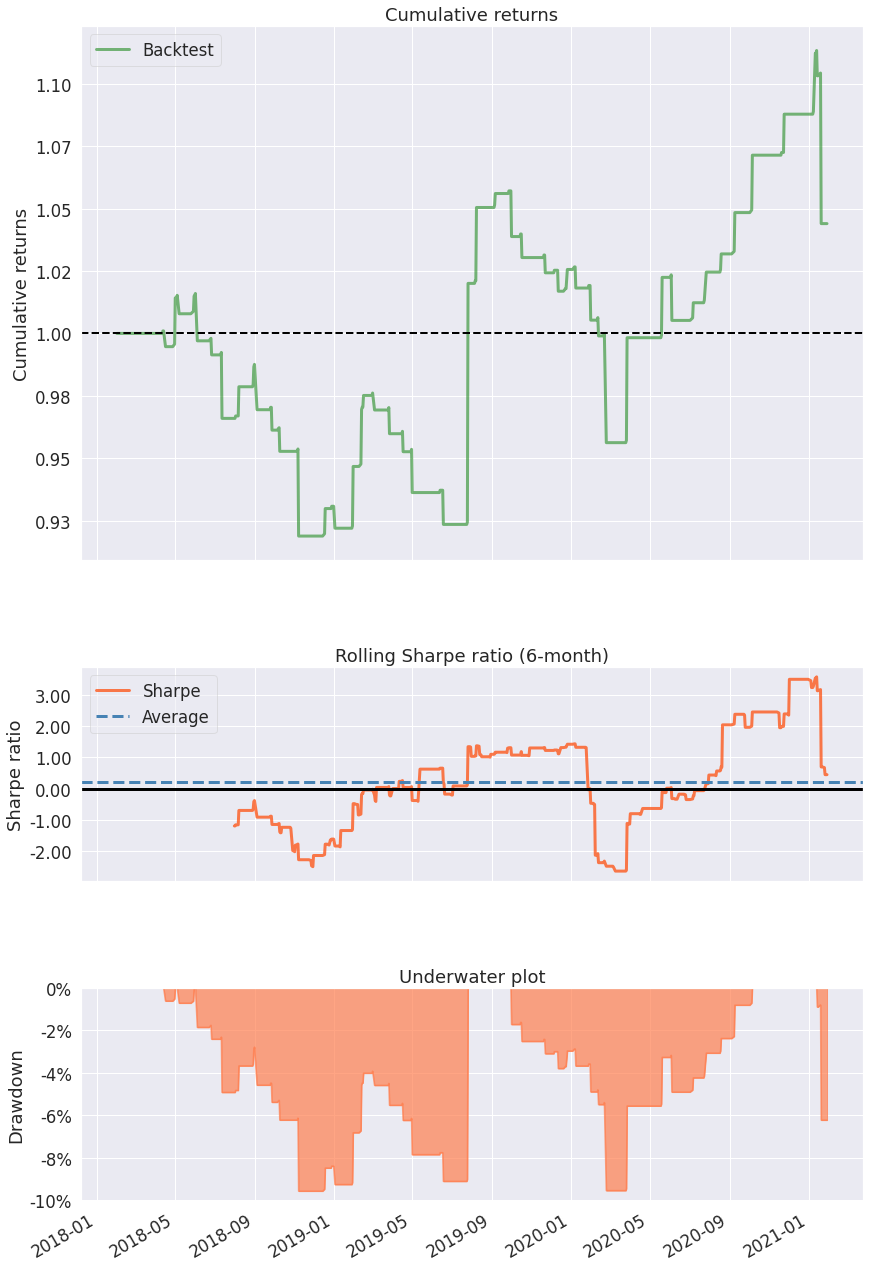

In [61]:
class MACD(BackTestSA):

    def __init__(self, dataframe, max_holding, commission):
        super().__init__(dataframe, max_holding, commission)



    def generate_signals(self):

        df = self.df
        
        #Define ema timespans
        slow_ema = 26
        fast_ema = 12
        singal_ema = 9
        
        #Compute macd
        df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(df["close"], 
                                                                    fastperiod=fast_ema, 
                                                                    slowperiod=slow_ema, 
                                                                    signalperiod=singal_ema)
        
        #Take difference between macd and macd signal, used to find crossovers
        df["macd_vs_signal"] = df["macd"] - df["macdsignal"]
        
        #Sell if macd crosses below macdsignal
        df['shorts'] = ((df["macd_vs_signal"]  > 0) & (df["macd_vs_signal"].shift(1) < 0)) * -1
        #Buy if macd crosses above macdsignal
        df['longs'] = ((df["macd_vs_signal"]  < 0) & (df["macd_vs_signal"].shift(1) > 0)) * 1

        df['entry'] = df.longs + df.shorts
        
        self.df = df


    def show_performace(self):
        m.df = m.df.set_index("timestamp")
        m.df['returns'] = m.returns_series

        pf.create_simple_tear_sheet( m.df['returns'])
        


dataframe = pd.read_csv("GOOG.csv", parse_dates=["Date"])
dataframe.rename(columns={"Date": "timestamp", "Close":"close"}, inplace=True)


max_holding = 180
commission = 0.001

m = MACD(dataframe, max_holding, commission)

m.run_backtest()
m.show_performace()
m.df['returns'] = m.returns_series